# Анализ внутривидовой изменчивости Df.

In [24]:
%matplotlib auto

Using matplotlib backend: TkAgg


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
data = pd.read_excel('data.xlsx', header=1)

In [4]:
num_features = ['L1p1l','L1p2l','W1p1l','W1p2l','L2p3l','L2p4l','W2p3l','W2p4l', 'S2p3l','S2p4l','Lkd','Wkd','OtnWLkd','Dvsh','Dosh','Lp','Dpl','Lns','Wns','Lvs','Wvs']
nonnum_features = ['Dp','Dvl','Dnl','Dc','Dvns','Dnns','Dvvs','Dnvs']
aux_features = ['Sp', 'idCP']
env_features = ['ALT', 'IC', 'PN', 'WK', 'CK', 'IOE', 'Ann_PREC']
data = data[num_features + nonnum_features + aux_features + env_features].dropna()
print('Исходный размер массива данных:', data.shape)

Исходный размер массива данных: (589, 38)


## Дисперсионный анализ (one way ANOVA)

In [5]:
datadum = pd.get_dummies(data, columns=nonnum_features)
dummies_nonnum = datadum.columns.difference(data.columns).tolist()
print('Data shape:', datadum.shape)
datadum[datadum.columns.difference(aux_features)] = datadum[datadum.columns.difference(aux_features)]/datadum[datadum.columns.difference(aux_features)].sum()
datadum = datadum.loc[datadum.Sp=='Df', :]

Data shape: (589, 69)


In [6]:
from collections import Counter
from scipy.stats import levene, f_oneway, kruskal

Сначала проверяем равенство дисперсий - потом выполняем тест Фишера, если неравны - непараметрический тест Крускала-Уоллиса.

Число уникальных районов:

In [7]:
print(datadum['idCP'].unique())

['IC1' 'IC2' 'BC3' 'BC4' 'BC5' 'BC6' 'ZC7' 'ZC8' 'ZC9' 'ZC10' 'AC11'
 'AC12' 'AC13' 'A14' 'A15' 'A16' 'A17' 'A18' 'A19' 'A20' 'A21' 'A22' 'A23'
 'A24' 'A25' 'A26' 'A27' 'A28' 'A29' 'A30' 'A31' 'A32' 'J33' 'J34' 'J35'
 'Kh36' 'Kh37' 'Kh38' 'Kh39' 'Kh40' 'Kh41' 'Kh42' 'Kh43' 'Kh44' 'Kh45'
 'Kh46' 'Kh47' 'Kh48' 'Kh49' 'Kh50' 'Kh51' 'PC52' 'P53' 'P54' 'MC55' 'M56'
 'M57' 'M58' 'M59' 'M60' 'M61' 'M62' 'M63' 'M64' 'M65' 'M66' 'M67' 'M68'
 'S69' 'S70' 'K71' 'K72' 'K73' 'K74' 'K75' 'K76' 'K77' 'K78' 'K79' 'K80'
 'K81' 'K82' 'K83' 'K84' 'K85' 'K86' 'K87' 'K88' 'K90' 'Ch91' 'Ch92'
 'Ch93' 'Ch94' 'Ch95' 'Ch96' 'Ch97' 'Ch98']


Число записей для каждого района:

In [8]:
counter = Counter(datadum['idCP'])
print(counter)

Counter({'ZC10': 20, 'AC12': 20, 'AC13': 20, 'BC5': 20, 'BC4': 20, 'ZC8': 20, 'BC6': 20, 'PC52': 20, 'IC2': 20, 'MC55': 20, 'ZC9': 20, 'AC11': 20, 'IC1': 20, 'ZC7': 20, 'BC3': 20, 'M60': 1, 'Ch92': 1, 'K79': 1, 'A21': 1, 'Kh46': 1, 'Kh45': 1, 'S69': 1, 'A19': 1, 'A16': 1, 'K90': 1, 'S70': 1, 'K80': 1, 'A17': 1, 'M68': 1, 'Kh40': 1, 'Kh36': 1, 'Kh38': 1, 'A15': 1, 'Kh41': 1, 'Ch96': 1, 'K86': 1, 'A22': 1, 'K87': 1, 'M56': 1, 'Kh50': 1, 'Ch97': 1, 'Ch91': 1, 'A24': 1, 'K73': 1, 'M65': 1, 'K74': 1, 'M58': 1, 'M62': 1, 'K85': 1, 'K83': 1, 'A32': 1, 'M64': 1, 'K82': 1, 'A31': 1, 'K78': 1, 'M67': 1, 'M61': 1, 'Kh49': 1, 'A14': 1, 'Kh48': 1, 'Kh43': 1, 'Ch93': 1, 'A18': 1, 'K72': 1, 'Kh47': 1, 'M57': 1, 'K84': 1, 'M66': 1, 'A27': 1, 'A25': 1, 'A20': 1, 'Ch95': 1, 'Ch98': 1, 'Kh51': 1, 'K81': 1, 'J35': 1, 'A28': 1, 'A29': 1, 'Kh44': 1, 'P53': 1, 'J34': 1, 'M63': 1, 'P54': 1, 'A30': 1, 'Kh39': 1, 'K88': 1, 'A23': 1, 'A26': 1, 'Kh42': 1, 'K75': 1, 'J33': 1, 'M59': 1, 'Ch94': 1, 'K77': 1, 'K76': 

Выделяем только районы, с количеством элементов > 1.

In [9]:
splitted = [datadum[datadum.idCP == x] for x in counter if counter[x] > 1]
places = [x for x in counter if counter[x] > 1]

In [10]:
len(splitted) # Итак - выделено 15 районов

15

In [11]:
anova = pd.DataFrame(columns=['test','p','stat','var'])
for var in num_features:
    res = [x[var].tolist() for x in splitted]
    if levene(*res).pvalue >= 0.05:
        anova = anova.append({'test': 'f', 'p': f_oneway(*res).pvalue, 'stat': f_oneway(*res).statistic, 'var': var}, ignore_index=True)
    else:
        anova = anova.append({'test': 'k', 'p': kruskal(*res).pvalue, 'stat': kruskal(*res).statistic, 'var': var}, ignore_index=True)

## Результаты дисперсионного анализа:

In [12]:
anova.sort_values(['stat', 'test'], ascending=False)

,test,p,stat,var
15,k,3.588796e-31,181.263127,Lp
16,k,2.228093e-28,167.462064,Dpl
2,k,5.700079e-27,160.473221,W1p1l
12,k,1.310619e-26,158.674530,OtnWLkd
3,k,2.685126e-26,157.123790,W1p2l
17,k,9.462450e-14,93.185357,Lns
8,k,2.953127e-12,85.264034,S2p3l
13,f,7.243949e-75,58.099104,Dvsh
7,f,7.146442e-42,25.119525,W2p4l
6,f,2.970907e-41,24.651234,W2p3l


Таким образом, наибольшие различия внутри df - наблюдаются по: Dvsh, W2p4l, W2p3l (первые три параметра); аналогично для случая неравных дисперсий (применялся тест Краскела-Уоллиса): Lp, Dpl, W1p1l.

In [13]:
len(anova['var'].unique()) == len(num_features) # Это (т.е True) означает, что зафиксированы значимые различия по всем параметрам

True

#### Визуализация различий (рассмотрим только те 6 признаков, которые показали максимальные различия)

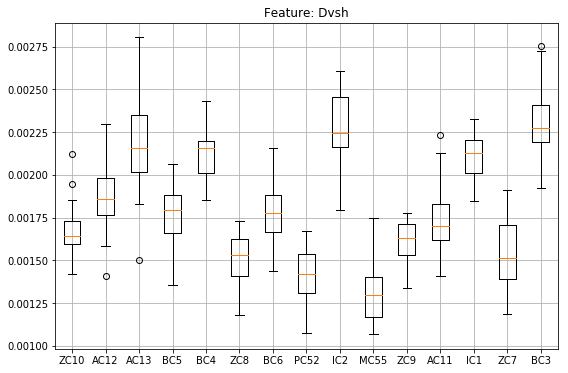

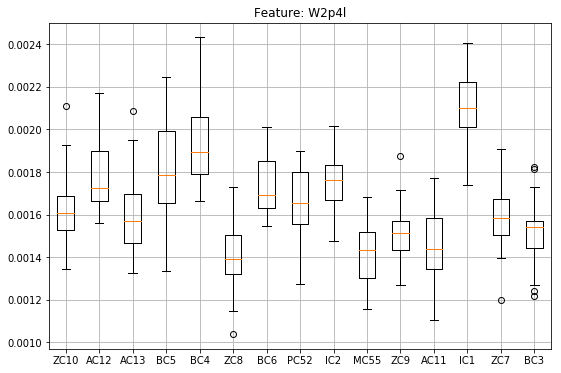

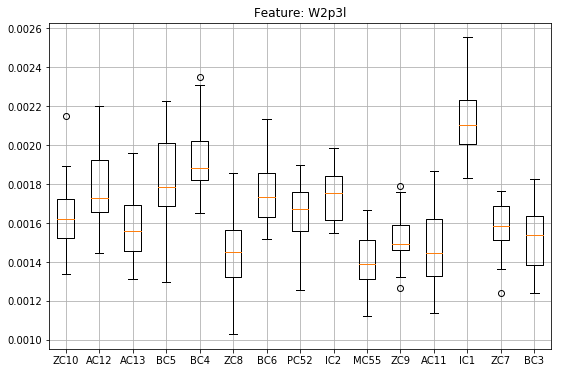

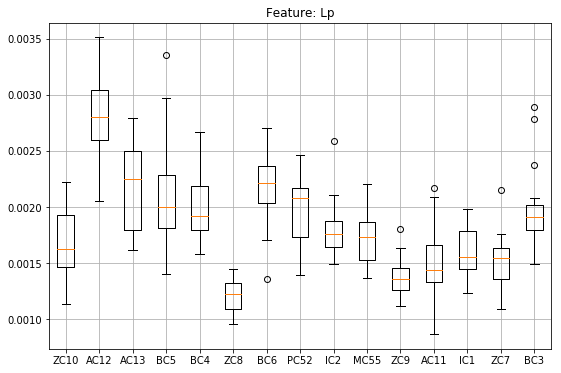

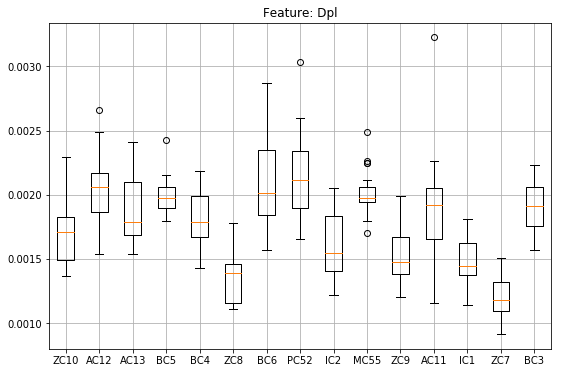

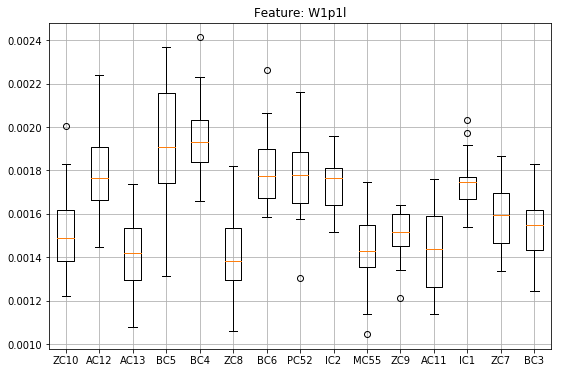

In [14]:
most_variable = ['Dvsh', 'W2p4l', 'W2p3l', 'Lp', 'Dpl', 'W1p1l']
for var in most_variable:
    res = [x[var].tolist() for x in splitted]
    f=plt.figure(figsize=(9,6))
    ax=f.add_subplot(111)
    ax.boxplot(res, labels=places)
    ax.set_title('Feature: %s' % var)
    ax.grid('on')
    

## Последующий анализ выявления различий (Post-hoc)

In [15]:
posthoc = pd.concat(splitted)

Comparison by var: Dvsh
Comparison by var: W2p4l
Comparison by var: W2p3l
Comparison by var: Lp
Comparison by var: Dpl
Comparison by var: W1p1l


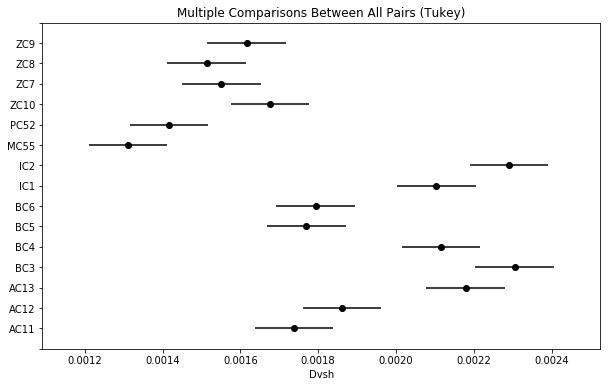

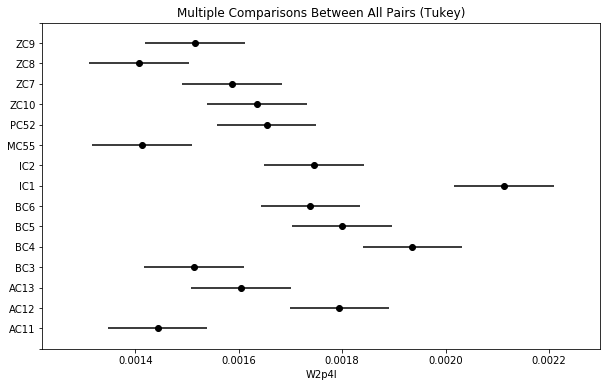

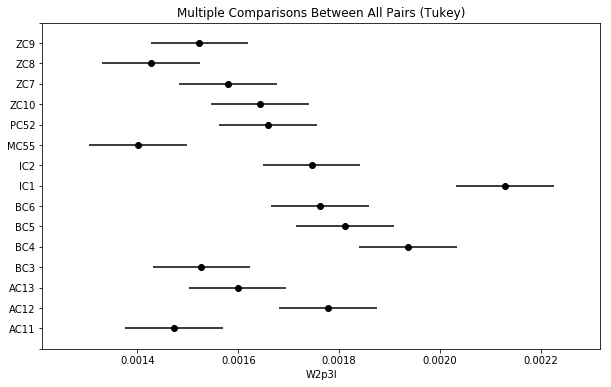

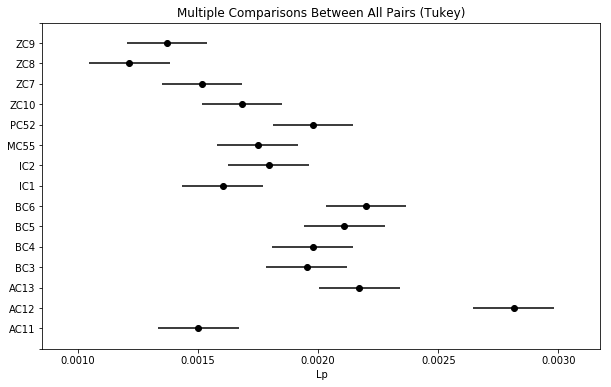

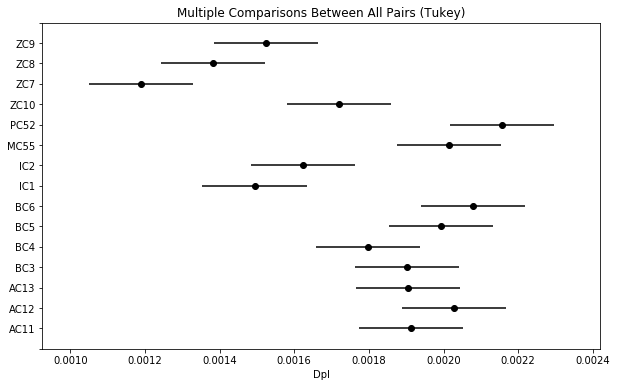

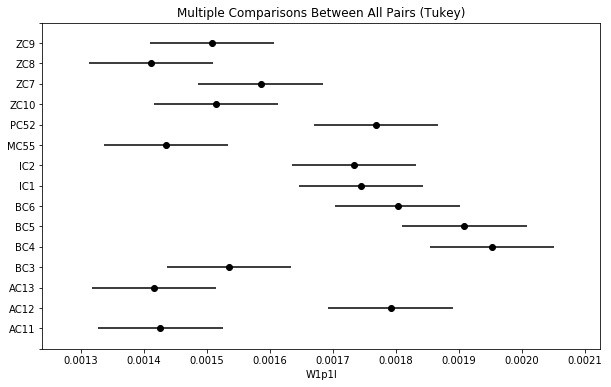

In [16]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
for var in most_variable:
    res = pairwise_tukeyhsd(posthoc[var], posthoc['idCP'], alpha=0.05)
    print('Comparison by var: %s' % var)
    res.plot_simultaneous(xlabel=var)


На графиках парных сравнений достаточно четко выделяются "эквивалентные" группы. Далее, нужно интерпретировать образование этих групп. Например, на первом рисунке, у нас четко вырисовывается группа в левом верхнем углу. Видимо здесь, для этой группы, сходные условия произрастания.
Зависимость параметров от факторов среды проведем с помощью канонического корреляционного анализа (CCA).

### Канонический корреляционный анализ (Canonical correlation analysis, CCA)

В анализе данного типа участвуют все записи (у которых вид Df), их общее число:

In [17]:
print('Dataset shape is:', datadum.shape)

Dataset shape is: (382, 69)


In [18]:
from sklearn.cross_decomposition import CCA
cca = CCA(n_components=2)

cca.fit(datadum[num_features], datadum[env_features])

CCA(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [19]:
X_c, Y_c = cca.transform(datadum[num_features], datadum[env_features])

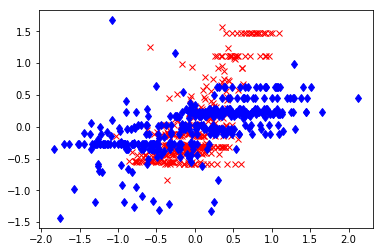

In [20]:
plt.plot(X_c[:, 0], Y_c[:, 0],'rx', X_c[:,1], Y_c[:,1], 'bd')

In [21]:
Y_c.shape, X_c.shape

((382, 2), (382, 2))

In [22]:
np.corrcoef(X_c[:,0], Y_c[:,0])

array([[1.        , 0.70453919],
       [0.70453919, 1.        ]])

In [23]:
np.corrcoef(X_c[:,1], Y_c[:,1])

array([[1.        , 0.58644251],
       [0.58644251, 1.        ]])

Анализ говорит о том, что найдены главные направления в зависимости между набором факторов и набором климатических данных. Самая большая главная корреляция - 0.7045, это существенное значение.
Рассмотрим вклады переменных в каждую из главных корреляций.

In [24]:
np.array(env_features)[np.argsort(np.abs(cca.y_weights_[:,0]))[::-1]]

array(['CK', 'Ann_PREC', 'IC', 'PN', 'IOE', 'WK', 'ALT'], dtype='<U8')

Наибольший вклад в корреляции оказывают IC, PN, CK, Ann_PREC; 

In [25]:
np.array(num_features)[np.argsort(np.abs(cca.x_weights_[:,0]))[::-1]]

array(['Lkd', 'L1p2l', 'Wkd', 'L2p4l', 'Dvsh', 'L2p3l', 'Dpl', 'W1p2l',
       'W2p3l', 'OtnWLkd', 'Lns', 'Wvs', 'W2p4l', 'S2p4l', 'Wns', 'L1p1l',
       'Dosh', 'Lvs', 'Lp', 'S2p3l', 'W1p1l'], dtype='<U7')

Переменные указаны в порядке взаимного влияния. Группа Ck, Ann_PREC, IC оказывает влияние в первую очередь на Lkd, L1p2l, Wkd ...

In [26]:
cca.y_weights_[:,0], env_features

(array([ 0.00274497, -0.44675745, -0.32442764,  0.02022573,  0.65786173,
         0.05263799,  0.50910221]),
 ['ALT', 'IC', 'PN', 'WK', 'CK', 'IOE', 'Ann_PREC'])

## Линейная регрессия

In [27]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
for var in num_features:
    y = datadum[var]
    X = datadum[env_features]
    lm.fit(X, y)
    args = np.argsort(np.abs(lm.coef_))[::-1]
    cf = np.array(lm.coef_)[args]
    nf = np.array(env_features)[args]
    print('Linear regression for var %s:'%var, '%1.3f' % lm.intercept_ + ''.join(['+%1.3f*%s'%(a, b) if a>0 else '%1.3f*%s'%(a, b) for a, b in zip(cf, nf)]))
    print('R2=', lm.score(X,y))


Linear regression for var L1p1l: 0.001+0.496*IC-0.286*CK-0.184*Ann_PREC+0.099*WK+0.057*ALT+0.039*PN+0.016*IOE
R2= 0.20135166934547136
Linear regression for var L1p2l: 0.001+0.537*IC-0.290*CK-0.174*Ann_PREC+0.106*WK+0.059*ALT+0.043*PN+0.008*IOE
R2= 0.2150180332213284
Linear regression for var W1p1l: 0.002+0.537*IC-0.413*CK-0.241*Ann_PREC+0.101*IOE-0.096*WK+0.055*ALT+0.019*PN
R2= 0.18270767619216377
Linear regression for var W1p2l: 0.002+0.617*IC-0.450*CK-0.228*Ann_PREC-0.121*WK+0.082*IOE+0.056*ALT+0.036*PN
R2= 0.17389709364552464
Linear regression for var L2p3l: 0.001+0.574*IC-0.318*CK-0.153*Ann_PREC+0.107*WK+0.054*ALT+0.051*PN-0.005*IOE
R2= 0.21994002211130104
Linear regression for var L2p4l: 0.001+0.580*IC-0.310*CK-0.165*Ann_PREC+0.111*WK+0.058*ALT+0.047*PN+0.000*IOE
R2= 0.2313948718861143
Linear regression for var W2p3l: 0.002+0.336*IC-0.325*CK-0.287*Ann_PREC+0.122*IOE+0.039*ALT-0.018*WK-0.017*PN
R2= 0.17573285720898657
Linear regression for var W2p4l: 0.002+0.379*IC-0.336*CK-0.288*A

## df-clustering...

Загрузка данных из файла...

In [2]:
import pandas as pd
import numpy as np
tocluster = pd.read_csv('data_unitless.csv', sep=';')

Импорт необходимых для анализа данных функций.

In [3]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn import cluster, mixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from collections import Counter
from pylab import *
from scipy.stats import kruskal, variation

Функция критерия Акаике: используется для определения наилучшего числа кластеров (т.е. на какой высоте обрезать
иерархическое дерево).

In [4]:
def RSS_elbow(X, y):
    '''AIC informational criterion'''
    rss = 0.0
    for val in np.unique(y):
        rss += np.sum((X[y==val, :] - np.mean(X[y==val, :], axis=0))**2)
    return 2 * len(np.unique(y)) + X.shape[0] * np.log(rss)
        

Формирование матрицы морфометрических признаков, ее стандартизация.

In [5]:
X = tocluster.iloc[:,13:].values
X = StandardScaler().fit_transform(X)

Метод снижения размерности: многомерное шкалирование показывает лучший результат, чем PCA...

In [6]:
# pca = PCA(n_components=2)
mds = MDS(n_components=3, random_state=10) #8

In [7]:
X_t_mds=mds.fit_transform(X) # Применение метода многомерного шкалирования к данным

Кластеризация с использованием метода Ward'a.

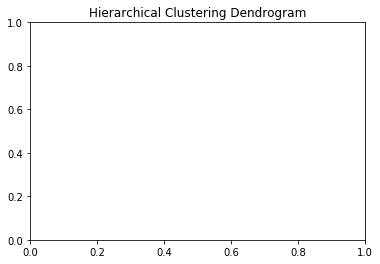

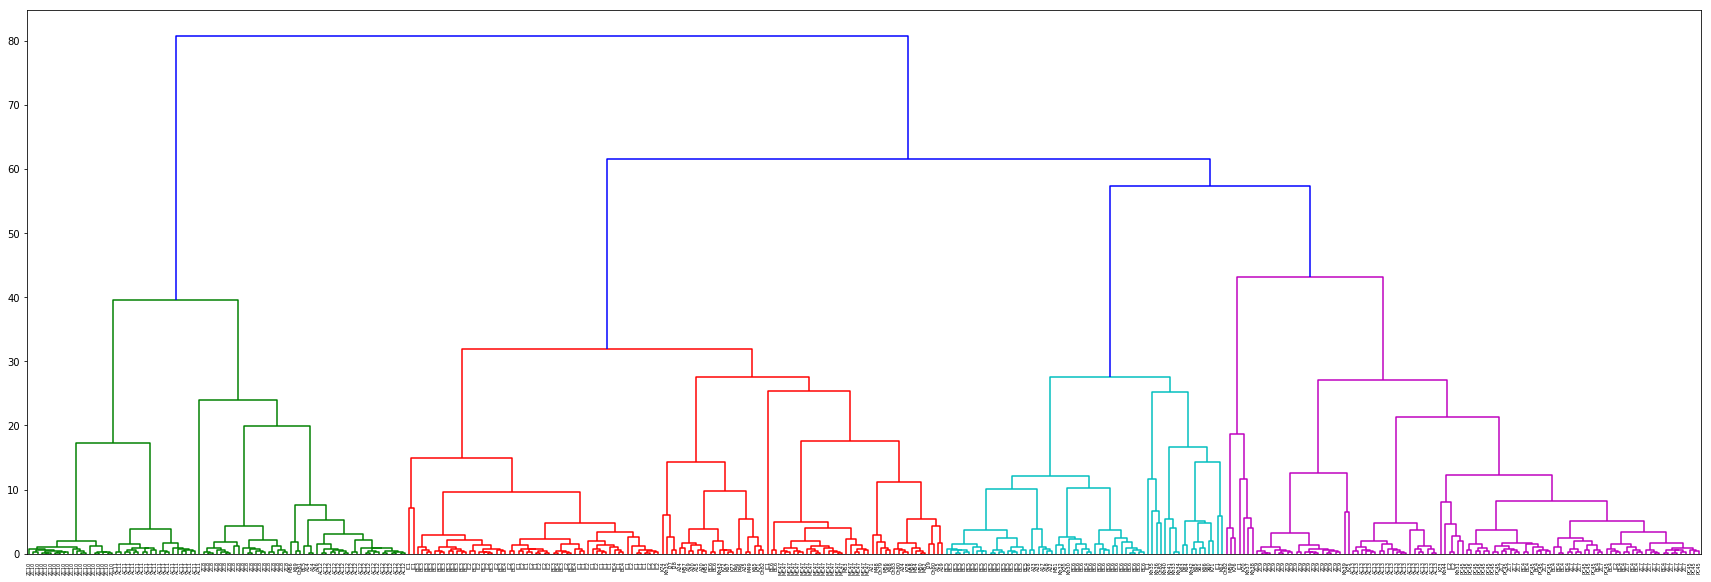

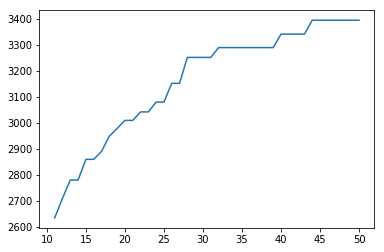

In [8]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
D = pdist(X_t_mds)
agl = linkage(D, method='ward')
plt.title('Hierarchical Clustering Dendrogram')
plt.figure(figsize=(30,10))
dendrogram(agl, labels=tocluster.POPUL_CODE.values)
plt.gcf().savefig('main.png', dpi=300)
plt.show()
elb = []
for h in np.arange(50, 10, step=-1):
    elb.append(RSS_elbow(X_t_mds, cut_tree(agl, height=h).ravel()))

figure()
plot(np.arange(50, 10, step=-1), elb)
show()
y_pred = cut_tree(agl, height=30).ravel()

Определение уровня "оптимального" обрезания дерева -- во многом экспертный процесс. Однако, в данном случае -- после длительного постоянного значения критерия AIC -- при пороге обрезания от 40 до 30 -- после 30 идет существенный скачок. Далее, мы используем уровень для выделения кластеров h=30.

Посчитаем приуроченность районов каждому из сформированных кластеров.

In [9]:
for val in np.unique(y_pred):
    print("Current cluster", val+1, Counter(tocluster.POPUL_CODE[y_pred==val]))

Current cluster 1 Counter({'BC3': 20, 'IC2': 17, 'IC1': 16, 'BC4': 5})
Current cluster 2 Counter({'BC5': 19, 'BC6': 16, 'A23': 2, 'IC1': 2, 'K65': 1, 'K66': 1, 'Kh32': 1, 'Ch82': 1, 'K70': 1, 'K63': 1, 'Kh33': 1, 'Kh41': 1, 'K62': 1, 'K71': 1, 'Kh36': 1, 'S60': 1, 'Kh35': 1, 'BC4': 1, 'K64': 1, 'A18': 1, 'S61': 1, 'Kh34': 1, 'Kh30': 1, 'A17': 1, 'A16': 1, 'A22': 1, 'M51': 1, 'Kh40': 1, 'Kh42': 1})
Current cluster 3 Counter({'MC47': 20, 'BC6': 4, 'Ch80': 2, 'A19': 2, 'A20': 2, 'A24': 2, 'P46': 2, 'A15': 2, 'M50': 1, 'K72': 1, 'J29': 1, 'J27': 1, 'M57': 1, 'Ch82': 1, 'K65': 1, 'M58': 1, 'M54': 1, 'A21': 1, 'M55': 1, 'K68': 1, 'K71': 1, 'Kh35': 1, 'M48': 1, 'M53': 1, 'M49': 1, 'M52': 1, 'K78': 1, 'Ch79': 1, 'J28': 1, 'A25': 1, 'IC1': 1, 'K74': 1, 'K67': 1, 'M56': 1, 'Kh43': 1, 'K77': 1, 'Ch83': 1})
Current cluster 4 Counter({'K76': 1, 'Kh37': 1, 'M59': 1, 'Ch82': 1, 'K70': 1, 'IC1': 1, 'Kh38': 1})
Current cluster 5 Counter({'ZC7': 20, 'ZC9': 20, 'AC13': 20, 'PC45': 20, 'BC4': 14, 'IC2': 3

Ищем характерные для найденных кластеров морфометрические особенности. Для этого вычислим вариацию каждого из признаков для каждого кластера.

In [107]:
import copy
col_names = tocluster.columns[13:]
un = {cl+1: set() for cl in np.unique(y_pred)}
for cl in np.unique(y_pred):
    values = tocluster.iloc[y_pred==cl, 13:].values
    res = variation(values, axis=0)
    res[np.isnan(res)] = 0.0
    inds = np.argsort(res)
    if not un[cl+1]:
        un[cl+1] = set(col_names.values[res==0.0])
    
 
uniq = copy.deepcopy(un)    
for cli in range(len(np.unique(y_pred))):
    for j in [x for x in range(len(np.unique(y_pred))) if x!=cli]:
        uniq[cli+1] = uniq[cli+1] - un[j+1]


/home/dmitry/.pyenv/versions/3.5.4/envs/sci/lib/python3.5/site-packages/scipy/stats/stats.py:998: RuntimeWarning: invalid value encountered in true_divide
  return a.std(axis) / a.mean(axis)


Найдены следующие особенности (Указан номер кластера и морфометрические признаки, которые постоянны только для этого кластера):

In [108]:
print(uniq)

{1: {'Dc_Re'}, 2: set(), 3: set(), 4: {'Dnns_ORe'}, 5: set(), 6: {'Dnns_Re'}, 7: set()}


Исследование постоянства пар признаков внутри кластеров, позволяет сделать вывод, что 7-й кластер обладает
уникальным набором из 63 пар качественных признаков, которые его однозначно характеризуют.
Кластера № 2, 3, 5  такими наборами не обладают.
Более того, рассмотрение триплетов признаков и наборов признаков еще более высоких порядков, существенно не изменяют картины.

In [109]:
from itertools import combinations
col_names = tocluster.columns[13:]
un = {cl+1: set() for cl in np.unique(y_pred)}
for cl in np.unique(y_pred):
    values = tocluster.iloc[y_pred==cl, 13:].values
    res = variation(values, axis=0)
    res[np.isnan(res)] = 0.0
    inds = np.argsort(res)
    if not un[cl+1]:
        un[cl+1] = set(list(combinations(col_names.values[res<=0.01],2)))
    
uniq = copy.deepcopy(un)    
for cli in range(len(np.unique(y_pred))):
    for j in [x for x in range(len(np.unique(y_pred))) if x!=cli]:
        uniq[cli+1] = uniq[cli+1] - un[j+1]

/home/dmitry/.pyenv/versions/3.5.4/envs/sci/lib/python3.5/site-packages/scipy/stats/stats.py:998: RuntimeWarning: invalid value encountered in true_divide
  return a.std(axis) / a.mean(axis)


### Пример уникальных пар признаков, характеризующих 7-й кластер:

In [13]:
print([len(uniq[k]) for k in uniq])
print(uniq[7])

[30, 0, 0, 20, 0, 26, 63]
{('Dvl_Re', 'Dvvs_ORe'), ('Dnl_Re', 'Dnvs_Re'), ('Dp_OG', 'Dvns_ORe'), ('Dvl_Re', 'Dnvs_Re'), ('Dp_Re', 'Dvl_G'), ('Dnl_O', 'Dvns_Re'), ('Dvns_G', 'Dvns_ORe'), ('Dvl_Re', 'Dnn_O'), ('Dvns_Re', 'Dvvs_ORe'), ('Dvns_Re', 'Dvvs_O'), ('Dp_OG', 'Dnl_ORe'), ('Dp_Re', 'Dnl_ORe'), ('Dvl_OG', 'Dvns_ORe'), ('Dvl_G', 'Dvns_ORe'), ('Dvns_Re', 'Dnvs_Re'), ('Dvl_Re', 'Dvvs_O'), ('Dnl_OG', 'Dvns_ORe'), ('Dvl_Re', 'Dvns_ORe'), ('Dnl_ORe', 'Dnns_OG'), ('Dvns_ORe', 'Dnvs_Re'), ('Dvl_G', 'Dnvs_ORe'), ('Dvns_Re', 'Dnn_O'), ('Dvns_ORe', 'Dvns_OG'), ('Dp_Re', 'Dnl_Re'), ('Dnl_ORe', 'Dvns_OG'), ('Dnl_G', 'Dvns_ORe'), ('Dp_ORe', 'Dvl_Re'), ('Dp_ORe', 'Dvl_G'), ('Dvns_ORe', 'Dnvs_G'), ('Dnl_ORe', 'Dnvs_OG'), ('Dvl_Re', 'Dvns_O'), ('Dp_Re', 'Dvns_ORe'), ('Dvl_OG', 'Dnl_ORe'), ('Dp_G', 'Dnl_ORe'), ('Dvl_G', 'Dnl_ORe'), ('Dc_OG', 'Dnvs_Re'), ('Dnl_ORe', 'Dvns_G'), ('Dp_Re', 'Dvl_Re'), ('Dp_Re', 'Dc_OG'), ('Dvns_ORe', 'Dvvs_ORe'), ('Dvl_Re', 'Dnl_ORe'), ('Dvl_G', 'Dnvs_Re'), ('Dnl_ORe', 'D

#### Исследование важности признаков в образовании кластеров при помощи дерева решений

In [14]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
dct.fit(X, y_pred)
inds = np.argsort(dct.feature_importances_)[::-1]
for feature, val in zip(col_names.values[inds], dct.feature_importances_[inds]):
    print(feature,' : ', val)
# Чем больше значение, тем больше вклад переменной в разделение по кластерам.
# Значения могут быть интерпретированы как доли.

Dnns_Re  :  0.22148861919139348
Dnl_ORe  :  0.17682933096945574
Dvsh/Dosh  :  0.14548572042285177
Dnl_O  :  0.13111126757193056
Dp_ORe  :  0.12585747562719918
Dnns_OG  :  0.045978138647363366
Dnl_Re  :  0.02641813000612338
Dvvs_ORe  :  0.015452779424984743
Dc_G  :  0.015348539634240866
Dvns_Re  :  0.015141877599011935
Dp_Re  :  0.012211028935318675
Lkd/L1p1l  :  0.010313350388541748
Dpl/Lp  :  0.010046165145315289
Dnvs_Re  :  0.007613935689081059
Dc_OG  :  0.006280202056469927
Dvl_OG  :  0.006209947547832076
Dvns_O  :  0.006186322747378356
Dnvs_G  :  0.005438525492200758
Dnns_ORe  :  0.004018466058126115
Ср.зн S2p3l-S2p4l  :  0.0031724732037837753
Dvl_Re  :  0.0031724732037837753
Dnvs_ORe  :  0.0031724732037837753
Dp_OG  :  0.0030527572338296637
Dnl_OG  :  0.0
Dp_O  :  0.0
Dvl_ORe  :  0.0
Dvl_G  :  0.0
Dvl_O  :  0.0
Dp_G  :  0.0
Сp_W  :  0.0
Dnl_G  :  0.0
Dc_Re  :  0.0
Сp_Y  :  0.0
Dc_ORe  :  0.0
Dc_O  :  0.0
Dvns_G  :  0.0
Dvns_ORe  :  0.0
Dvns_OG  :  0.0
Dnns_G  :  0.0
Dnn_O  :  0.0


Parameter: ALT
Kruskall-Wallis test:  KruskalResult(statistic=63.129357655365816, pvalue=1.0387405999574221e-11)
Parameter: IC
Kruskall-Wallis test:  KruskalResult(statistic=48.465282058639694, pvalue=9.538382273155941e-09)
Parameter: PN
Kruskall-Wallis test:  KruskalResult(statistic=30.607346514553647, pvalue=3.0121102971646836e-05)
Parameter: WK
Kruskall-Wallis test:  KruskalResult(statistic=94.58111354367621, pvalue=3.3795024998213314e-18)
Parameter: CK
Kruskall-Wallis test:  KruskalResult(statistic=100.42458274249499, pvalue=2.0462698845302198e-19)
Parameter: IOE
Kruskall-Wallis test:  KruskalResult(statistic=31.169887222775124, pvalue=2.3524425959777803e-05)
Parameter: Ann_PREC
Kruskall-Wallis test:  KruskalResult(statistic=158.9126744363211, pvalue=1.0062567317569509e-31)


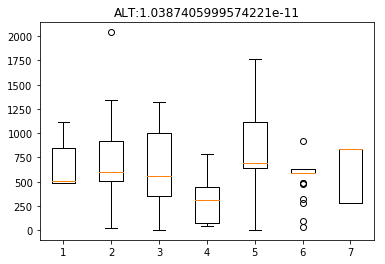

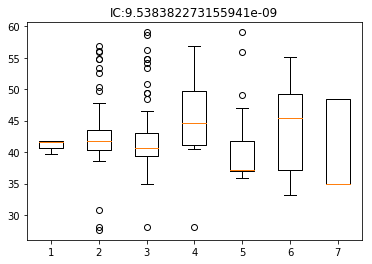

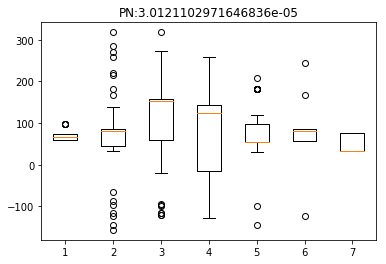

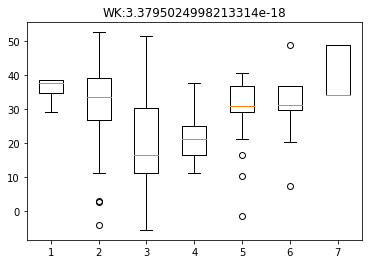

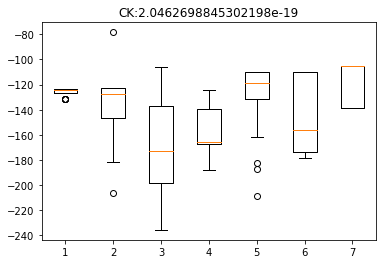

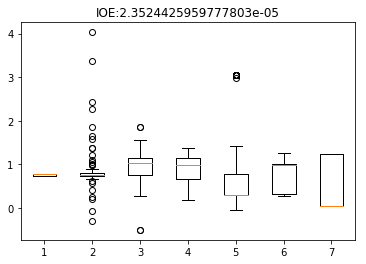

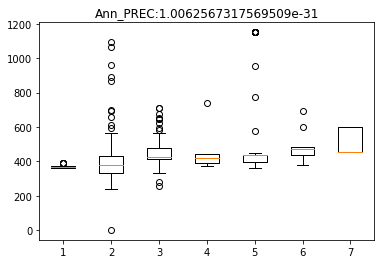

In [17]:
for par in tocluster.columns[6:13]:
    print("Parameter:", par)
    kr = kruskal(*[tocluster.loc[y_pred==val, par].values for val in np.unique(y_pred)])
    figure()
    boxplot([tocluster.loc[y_pred==val, par].values for val in np.unique(y_pred)])
    title(par + ':' + str(kr.pvalue))
    print("Kruskall-Wallis test: ", kr)
show()

In [18]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier()
factors = StandardScaler().fit_transform(tocluster.iloc[:,6:13].values)
dct.fit(factors,y_pred)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Вклады факторов среды в разделение по кластерам. 

In [23]:
inds = np.argsort(dct.feature_importances_)[::-1]
for feature, val in zip(tocluster.columns[6:13].values[inds], dct.feature_importances_[inds]):
    print(feature,' : ', val)


Ann_PREC  :  0.2815731076520546
ALT  :  0.2621354544057442
CK  :  0.20083806609528493
IC  :  0.11219252210723892
WK  :  0.07953798089955144
IOE  :  0.045616050177619674
PN  :  0.018106818662506168


Попарное сравнение -- выяснение значимых различий по условиям среды, характерных для выделенных кластеров

Comparison by var: 6
Comparison by var: 7
Comparison by var: 8
Comparison by var: 9
Comparison by var: 10
Comparison by var: 11
Comparison by var: 12


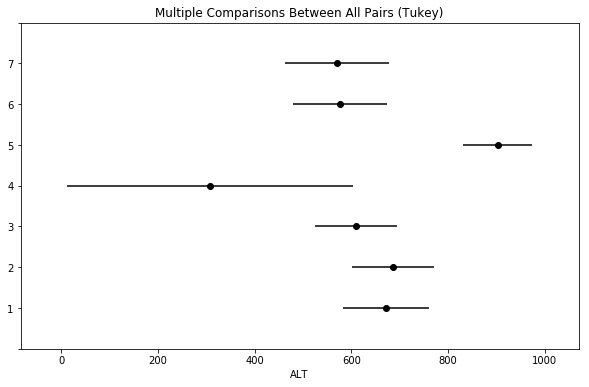

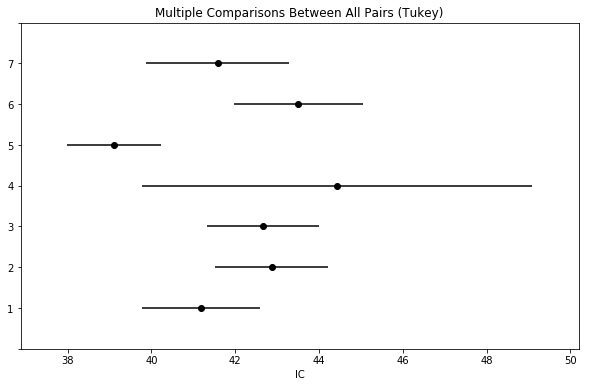

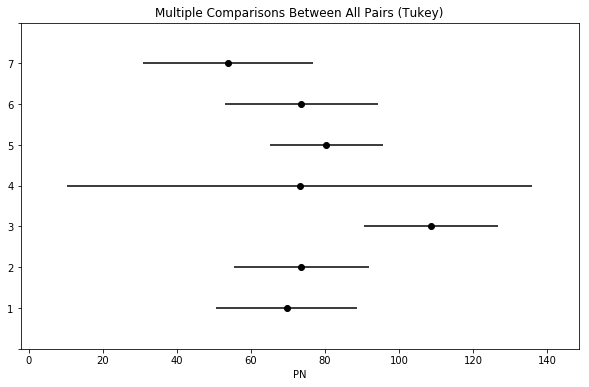

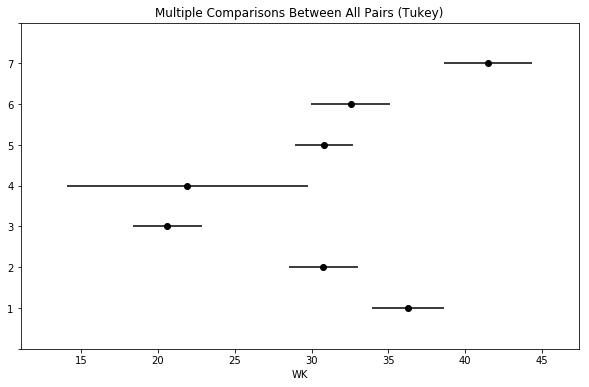

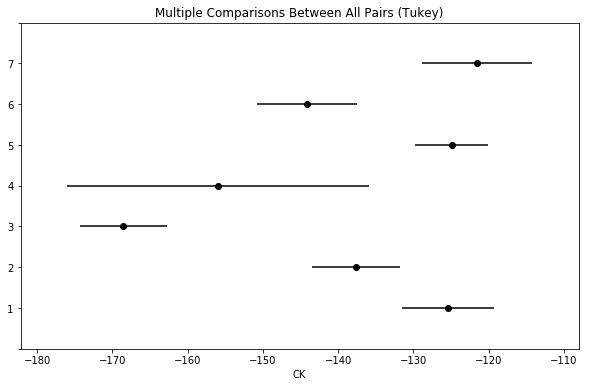

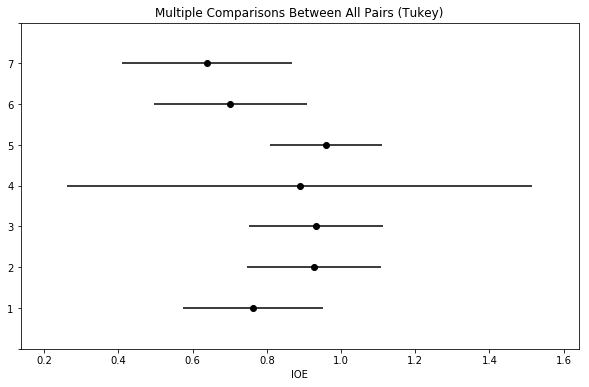

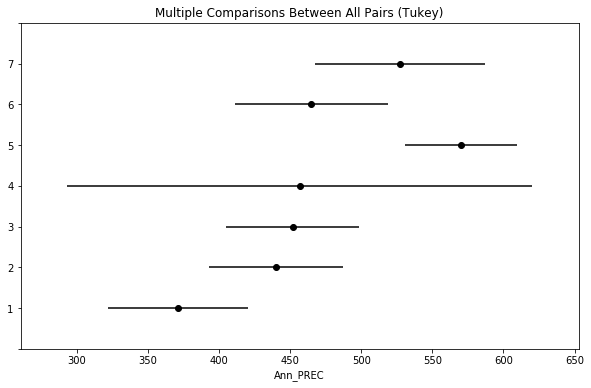

In [28]:
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
for var in range(6, 13):
    res = pairwise_tukeyhsd(tocluster.iloc[:,var], y_pred+1, alpha=0.05)
    print('Comparison by var: %s' % var)
    res.plot_simultaneous(xlabel=tocluster.columns[var])
show()

По фактору <ALT> можно сделать следующие выводы: 5-й кластер имеет значимо отличающиеся высоты от остальных кластеров, 4-й кластер -- самою большую изменчивость этого параметра; 
По оси ординат -- идут кластера, каждая картинка соответствует определенному фактору среды. Если интервалы не накрываюся, то значит соответствующие кластера имеют значимые различия по данному фактору среды. 
Уровень значимости принимается равным 0.05. (Значение по умолчанию для используемой функции).
    
    Далее, здесь необходимо описание результатов: Например,такое -- По параметру Ann_PREC 5 и 1 кластера значимо отличаются. Это вызвано тем, что представители 5-го кластера находятся преимущественно в таких-то условиях -- в данном случае -- более влажных, а для сборов, принадлежащих кластеру 1, характерны наоборот, более сухие местообитания. и т.п. почему ... 

## Регрессионные модели, оценка точности регрессионных моделей


In [83]:
from sklearn import linear_model
lr = linear_model.ElasticNet(alpha=.0)
lgr = linear_model.LogisticRegressionCV(cv=10)

In [84]:
num_vars = tocluster.columns[13:18]
non_num_vars = tocluster.columns[18:]

Попытка предсказать значения количественных признаков по факторам среды. Ниже приводятся значения коэффициентов детерминации (R2). 

In [110]:
for var in num_vars:
    y=tocluster.loc[:,var].values
    lr.fit(factors, y)
    print(var, lr.score(factors, y))

Wkd/Lkd 0.06087961813792453
Dvsh/Dosh 0.21284478317899735
Lkd/L1p1l 0.08307711498351211
Dpl/Lp 0.15584257101993115
Ср.зн S2p3l-S2p4l 0.0940775691782022


/home/dmitry/.pyenv/versions/3.5.4/envs/sci/lib/python3.5/site-packages/ipykernel_launcher.py:3: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dmitry/.pyenv/versions/3.5.4/envs/sci/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/dmitry/.pyenv/versions/3.5.4/envs/sci/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [98]:
tocluster.columns[6:13].values

array(['ALT', 'IC', 'PN', 'WK', 'CK', 'IOE', 'Ann_PREC'], dtype=object)

## Логистическая регрессия: предсказание значений качественных признаков по факторам среды.

Dp_G: -- достаточно хорошо предсказывается по факторам среды (с точностью 0.91 +/- 0.08); При этом коэффициенты, соответствующие параметрам IC и CK имеют больший порядок вклада в регрессионную модель.

In [111]:
for var in non_num_vars:
    y=tocluster.loc[:,var].values
    if len(np.unique(y))>1:
        lgr.fit(factors, y)
        print(var, np.mean(lgr.scores_[1]),'+/-', np.std(lgr.scores_[1]))
        print(lgr.coef_.ravel())

Dp_G 0.9091946602472918 +/- 0.07965122181547842
[-6.88807990e-04 -1.52437799e-03 -2.86733539e-05  8.13188473e-04
  1.56036825e-03 -8.44806753e-04 -1.23708979e-04]


/home/dmitry/.pyenv/versions/3.5.4/envs/sci/lib/python3.5/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Dp_OG 0.9504504504504506 +/- 0.15005945516830205
[-1.00246421e-03  3.65209007e-04 -1.29488935e-04 -1.12560740e-03
 -4.53503184e-04  1.10125545e-04  3.86327945e-05]
Dp_ORe 0.7544330160119634 +/- 0.14625950459177767
[ 0.42961099 -0.1467596   1.34880601  2.5489009  -1.7432406  -2.91866762
  1.9416989 ]
Dp_Re 0.6306781376518218 +/- 0.15014679482175636
[ 0.00446541 -0.00079136  0.0019244  -0.00409907 -0.00177574  0.00302916
 -0.00058112]
Dvl_Re 0.6702436444541705 +/- 0.17992030011225826
[ 0.0041929  -0.00292531  0.0005556  -0.00365843  0.00073532  0.00102881
 -0.00093211]
Dvl_OG 0.9306612685560052 +/- 0.13033145681304317
[-0.00142431  0.00019499  0.00090811 -0.00061104 -0.00060915  0.00070159
  0.00010529]
Dvl_ORe 0.6808063427800269 +/- 0.21923225231989688
[-0.00256975  0.00273317 -0.00139246  0.00400675 -0.00032463 -0.0016827
  0.00104366]


/home/dmitry/.pyenv/versions/3.5.4/envs/sci/lib/python3.5/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Dvl_G 0.9604719699456541 +/- 0.13677554822086166
[-2.11427722e-04  5.01992353e-06 -6.94074046e-05  2.63067739e-04
  1.91908129e-04 -4.66002758e-05 -2.19012983e-04]
Dnl_ORe 0.5461673414304992 +/- 0.14847169422684078
[ 0.99999015  0.93691268  0.74583787 -0.13439149  1.01492657 -0.56163966
  0.1001139 ]
Dnl_OG 0.9104147062041801 +/- 0.12354734887038538
[-0.0029367   0.00195353 -0.00035415 -0.00252359 -0.0015879   0.00013502
  0.00068013]
Dnl_Re 0.7182860998650472 +/- 0.12151502985511899
[-0.11221775 -0.43202688 -0.30327812  0.07994602 -0.71521821  0.672565
 -1.19239197]
Dnl_G 0.9604719699456541 +/- 0.13677554822086166
[-2.11427722e-04  5.01992353e-06 -6.94074046e-05  2.63067739e-04
  1.91908129e-04 -4.66002758e-05 -2.19012983e-04]
Dnl_O 0.9315384615384613 +/- 0.05422712326779201
[ 19.31192651 -12.25200941   2.9662523   40.12991989 -16.46758477
 -10.54244921   1.74714149]
Dc_G 0.7949903344640186 +/- 0.1455928700689411
[ 0.0023725  -0.00234665 -0.00401067  0.00290047  0.0072553  -0.00229838

/home/dmitry/.pyenv/versions/3.5.4/envs/sci/lib/python3.5/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Dc_OG 0.9666329284750339 +/- 0.11807500932182834
[-1.58599547e-04  3.79240799e-06 -5.21036579e-05  1.97314376e-04
  1.43941863e-04 -3.49741816e-05 -1.64313982e-04]
Dvns_Re 0.664155450997556 +/- 0.18394961941407692
[ 0.00286646 -0.00347274  0.00068043  0.00108807  0.0038241   0.00184683
  0.00102195]
Dvns_G 0.9427234927234929 +/- 0.12711009473273044
[ 0.000226    0.00030662  0.00036306 -0.00065196 -0.00097876  0.00012326
 -0.00013732]
Dvns_ORe 0.7089610460663089 +/- 0.16176426288823248
[-0.0021547   0.00252444 -0.00055518 -0.0002056  -0.00261698 -0.00188972
 -0.00122824]


/home/dmitry/.pyenv/versions/3.5.4/envs/sci/lib/python3.5/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 5 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Dvns_OG 0.9482605682605683 +/- 0.15648919987938614
[-0.00082912  0.00052739 -0.00048755 -0.00041399 -0.00024078 -0.00013821
  0.00027578]


/home/dmitry/.pyenv/versions/3.5.4/envs/sci/lib/python3.5/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


Dvns_O 0.9796052631578946 +/- 0.08595892612526879
[-1.17531732e-04  1.30806913e-04 -3.82692587e-06  1.73335114e-04
 -5.37948427e-06  5.75810700e-05  6.48565481e-05]
Dnns_Re 0.6363668526826423 +/- 0.24484029084201556
[ 0.32853034 -0.50719957 -0.2001719  -0.42238795  0.1366599  -0.1627542
 -0.01567647]
Dnns_OG 0.9102665317138999 +/- 0.15065594001697527
[-0.0014571   0.00171983 -0.00089463 -0.00176863 -0.00156136 -0.00014236
  0.00098704]
Dnns_ORe 0.7768322573585733 +/- 0.12236405481102908
[ 0.09949811  1.22930703  0.65025623  1.02351092 -0.09277476  0.7814657
 -0.77068663]
Dnn_O 0.932845141700405 +/- 0.07061603218230231
[  55.02879674   43.23679316  229.81316258  228.89581595   23.38582253
 -179.37949647 -121.6325729 ]
Dvvs_ORe 0.6908906882591092 +/- 0.15271858436509728
[ 1.14539329 -3.93556647 -4.11617705  3.66156569 -4.08248404  2.95303039
 -0.82034385]
Dvvs_Re 0.8001012145748989 +/- 0.11991532471333803
[-0.00174774  0.00355867 -0.00031979 -0.0033597  -0.00251489  0.00157012
  0.001404

In [ ]:
b


# Осредненные данные 

In [1]:
import pandas as pd
from pylab import *
mdata = pd.read_excel('cluster_mean.xlsx')

In [2]:
X = mdata.iloc[:,13:].values
X = StandardScaler().fit_transform(X)

NameError: name 'StandardScaler' is not defined

In [18]:
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
D = pdist(X)
agl = linkage(D, method='ward')
plt.title('Hierarchical Clustering Dendrogram')
plt.figure(figsize=(30,10))
dendrogram(agl, labels=mdata.POPUL_CODE.values)
plt.gcf().savefig('main_mean.png', dpi=300)
plt.show()
elb = []
for h in np.arange(50, 10, step=-1):
    elb.append(RSS_elbow(X, cut_tree(agl, height=h).ravel()))

figure()
plot(np.arange(50, 10, step=-1), elb)
show()
y_pred = cut_tree(agl, height=30).ravel()